In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the coffee dataset
file_path = 'coffee.csv' 
coffee_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(coffee_df.head())


   transaction_id transaction_date transaction_time  transaction_qty  \
0               1         1/1/2023          7:06:11                2   
1               2         1/1/2023          7:08:56                2   
2               3         1/1/2023          7:14:04                2   
3               4         1/1/2023          7:20:24                1   
4               5         1/1/2023          7:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg 

In [14]:
# Calculate the total order of each product type
total_orders_df = coffee_df.groupby(['product_category', 'product_type'])['transaction_qty'].sum().reset_index()

# Rename columns as required
total_orders_df.columns = ['category', 'product', 'total_order']

# Display the resulting DataFrame
print(total_orders_df)
total_orders_df.describe()

              category                product  total_order
0               Bakery               Biscotti         5788
1               Bakery                 Pastry         6961
2               Bakery                  Scone        10465
3              Branded               Clothing          221
4              Branded             Housewares          555
5               Coffee       Barista Espresso        24943
6               Coffee            Drip coffee        12891
7               Coffee  Gourmet brewed coffee        25973
8               Coffee  Organic brewed coffee        13012
9               Coffee  Premium brewed coffee        12431
10        Coffee beans         Espresso Beans          319
11        Coffee beans          Gourmet Beans          366
12        Coffee beans            Green beans          134
13        Coffee beans      House blend Beans          183
14        Coffee beans          Organic Beans          420
15        Coffee beans          Premium Beans          4

,total_order
count,29.000000
mean,7395.517241
std,8731.215640
min,134.000000
25%,305.000000
50%,2905.000000
75%,12891.000000
max,26250.000000


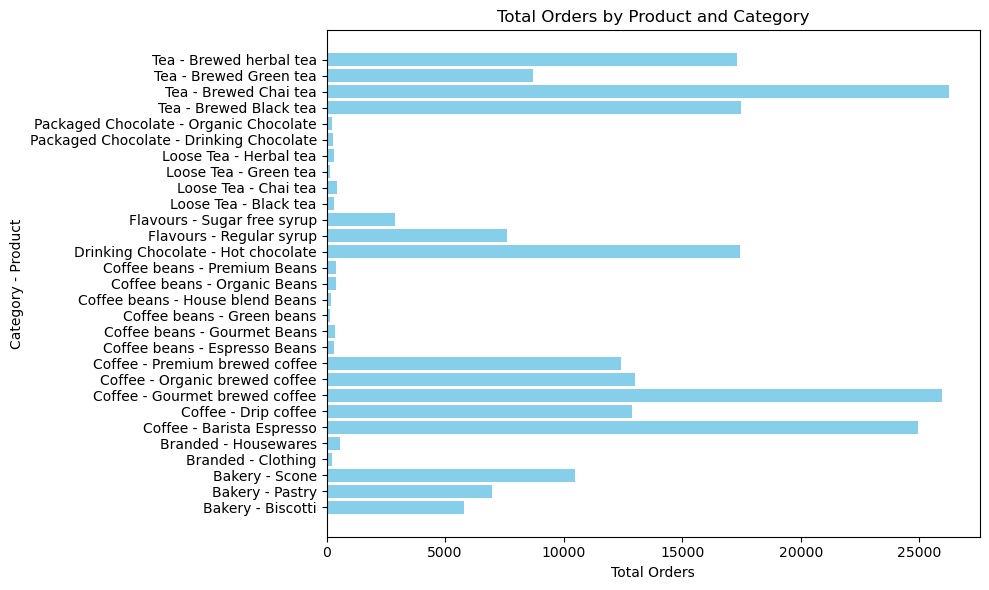

In [3]:
# Create a bar plot to visualize the total orders of each product
plt.figure(figsize=(10, 6))
plt.barh(total_orders_df['category'] + ' - ' + total_orders_df['product'], total_orders_df['total_order'], color='skyblue')
plt.xlabel('Total Orders')
plt.ylabel('Category - Product')
plt.title('Total Orders by Product and Category')
plt.tight_layout()

# Display the plot
plt.show()


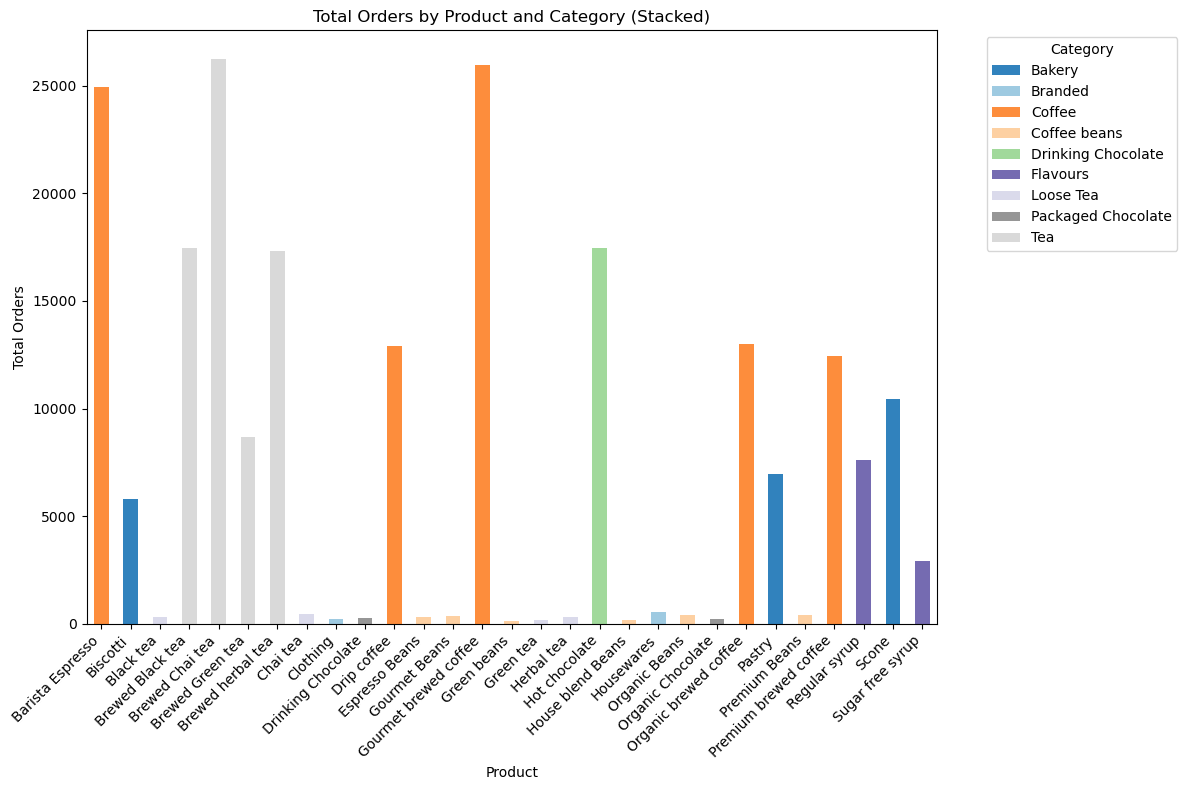

In [5]:
# Pivot the DataFrame to prepare it for a stacked bar chart
pivot_df = total_orders_df.pivot(index='product', columns='category', values='total_order')

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20c')

plt.xlabel('Product')
plt.ylabel('Total Orders')
plt.title('Total Orders by Product and Category (Stacked)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()


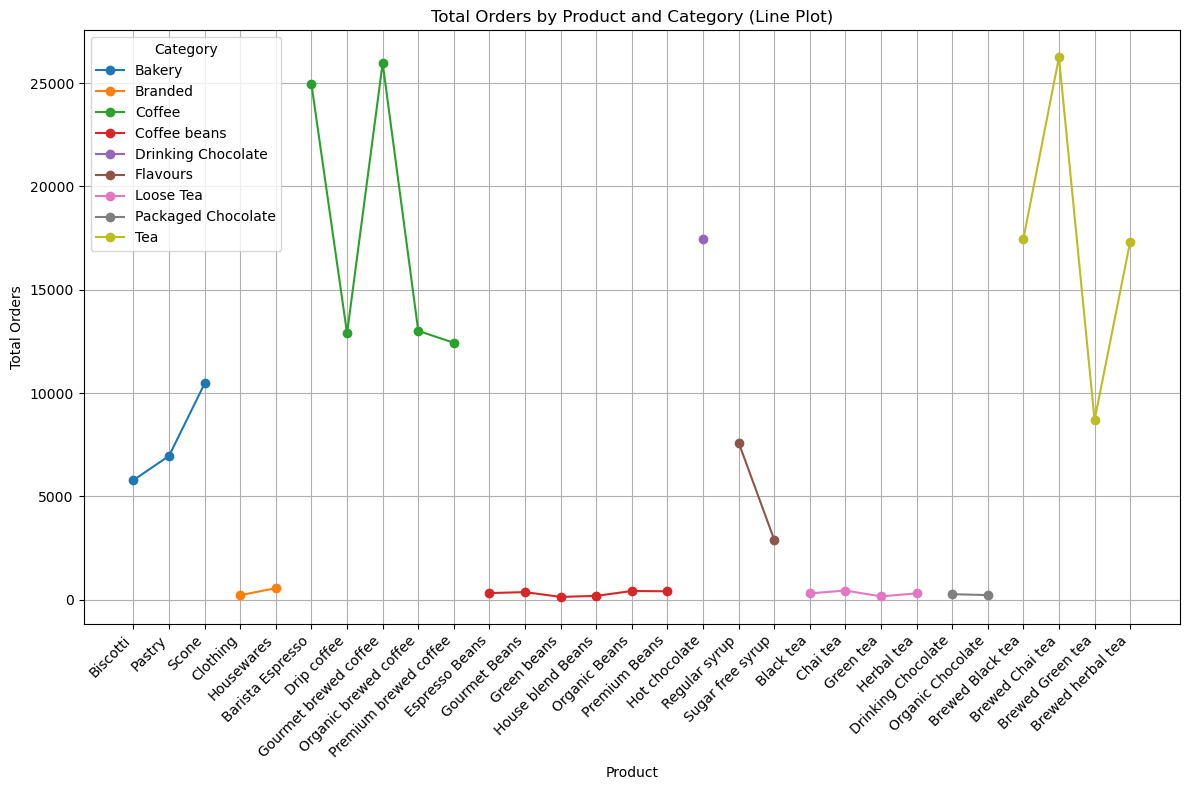

In [15]:
# Plot a line plot to visualize the total orders of each product
plt.figure(figsize=(12, 8))

# Loop through each category and plot the line for each
for category in total_orders_df['category'].unique():
    category_data = total_orders_df[total_orders_df['category'] == category]
    plt.plot(category_data['product'], category_data['total_order'], marker='o', label=category)

plt.xlabel('Product')
plt.ylabel('Total Orders')
plt.title('Total Orders by Product and Category (Line Plot)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\Ricky\AppData\Local\Temp\ipykernel_9192\3131540101.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(categories))


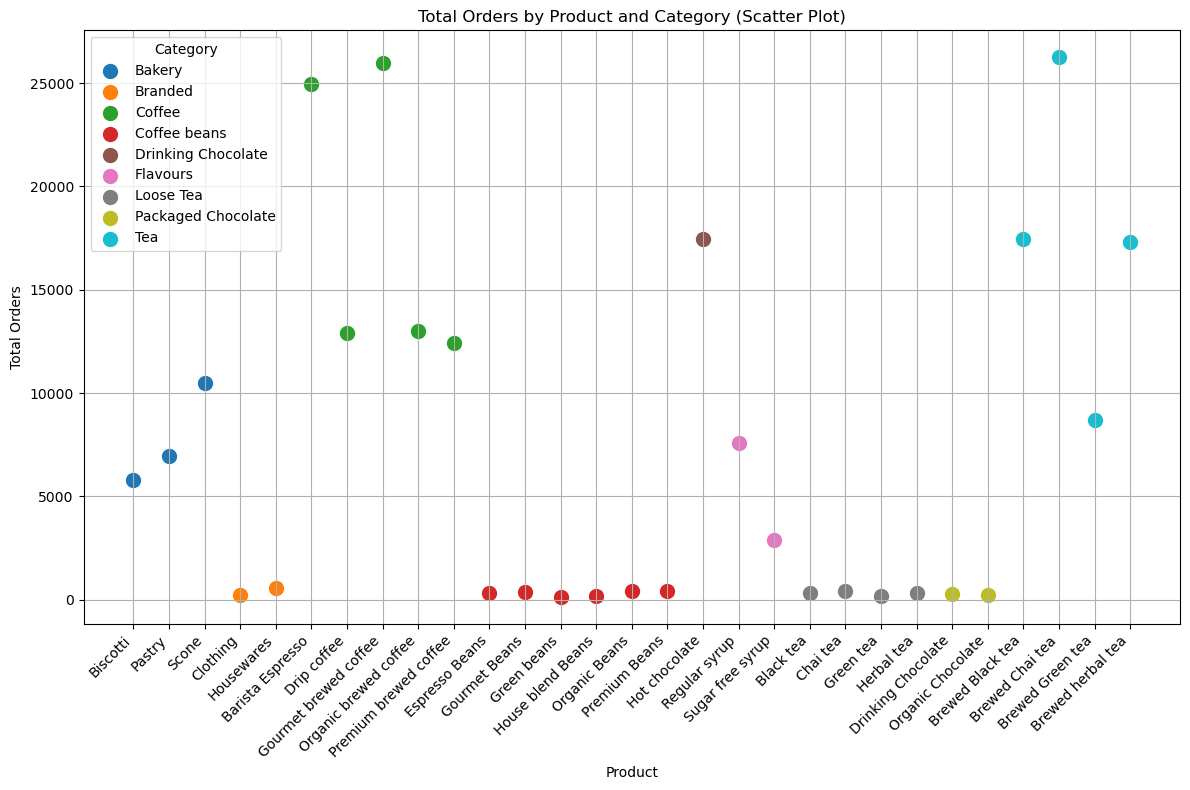

In [16]:
# Create a scatter plot to visualize the total orders of each product
plt.figure(figsize=(12, 8))

# Use a scatter plot to display the total orders for each product, colored by category
categories = total_orders_df['category'].unique()
colors = plt.cm.get_cmap('tab10', len(categories))

for i, category in enumerate(categories):
    category_data = total_orders_df[total_orders_df['category'] == category]
    plt.scatter(category_data['product'], category_data['total_order'], color=colors(i), label=category, s=100)

plt.xlabel('Product')
plt.ylabel('Total Orders')
plt.title('Total Orders by Product and Category (Scatter Plot)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()
